In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
train_df = pd.read_csv('/home/karen/Documents/Datasets/Store Sales Forecasting/train.csv')
# train_df = train.set_index('id')
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [28]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [29]:
train_df["date"] = pd.to_datetime(train_df["date"])
train_df = train_df.set_index('date')
train_df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [30]:
train_df["year"] = train_df.index.year
train_df["month"] = train_df.index.month
train_df

,id,store_nbr,family,sales,onpromotion,year,month
date,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,2013,1
2013-01-01,1,1,BABY CARE,0.000,0,2013,1
2013-01-01,2,1,BEAUTY,0.000,0,2013,1
2013-01-01,3,1,BEVERAGES,0.000,0,2013,1
2013-01-01,4,1,BOOKS,0.000,0,2013,1
...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,2017,8
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,2017,8
2017-08-15,3000885,9,PRODUCE,2419.729,148,2017,8


In [31]:
train_df.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

<Axes: xlabel='date', ylabel='sales'>

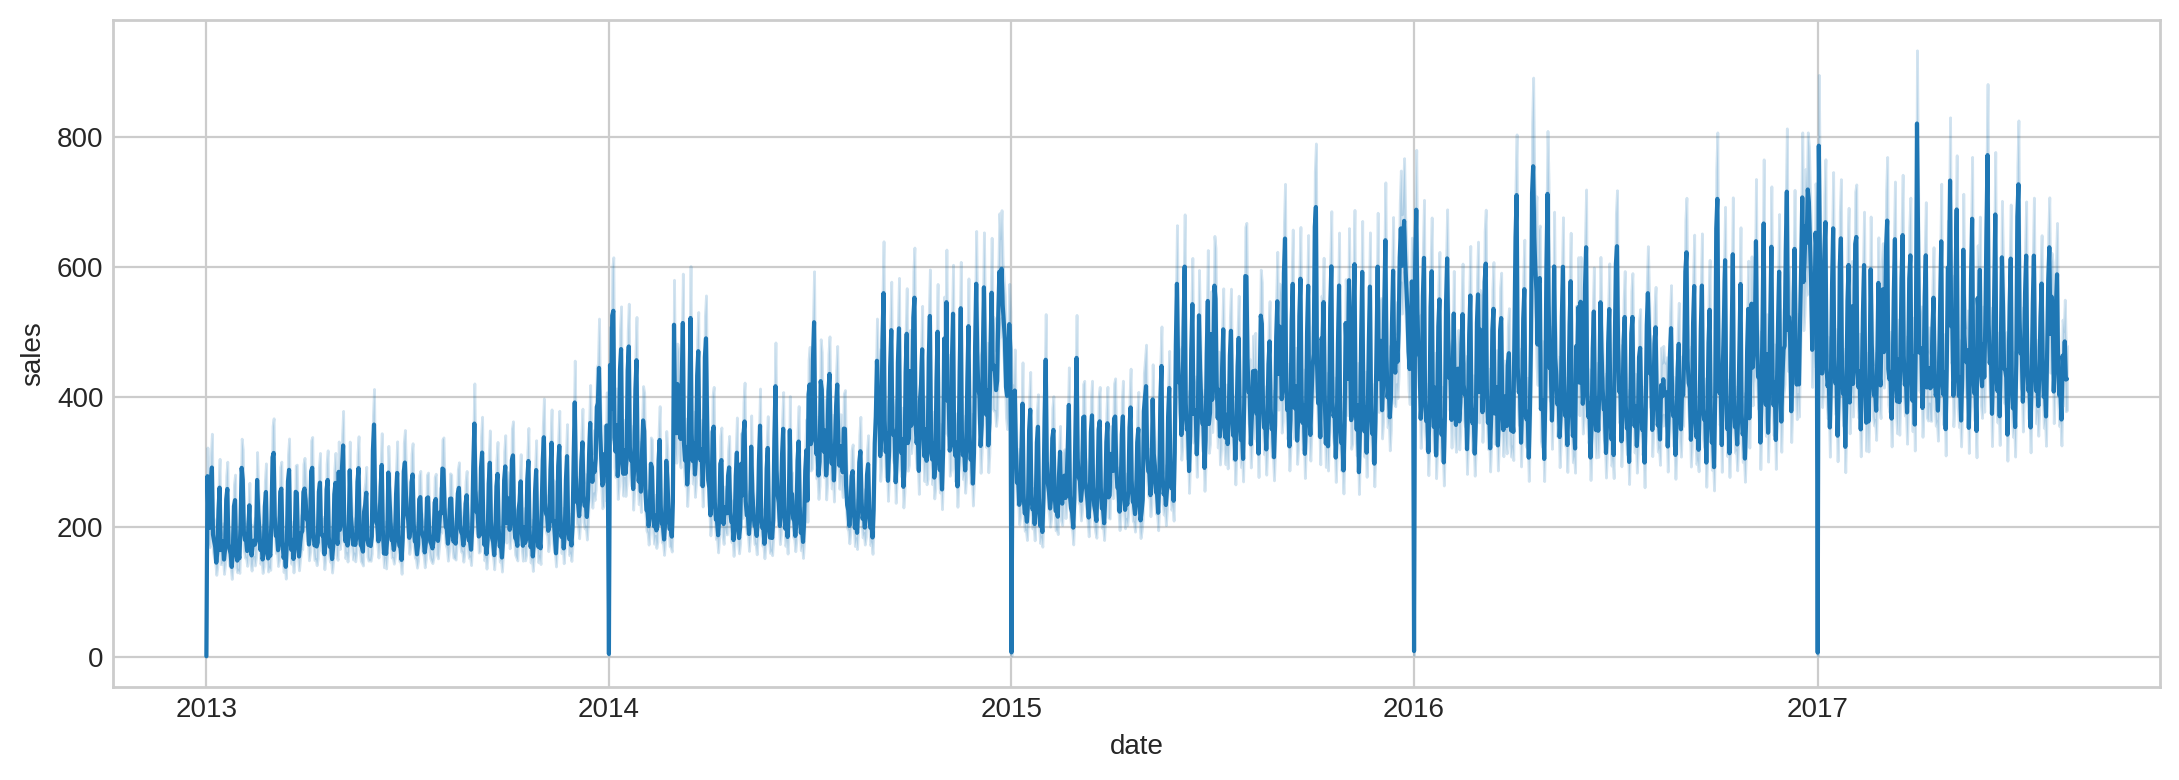

In [32]:
sns.lineplot(data = train_df["sales"])

<Axes: xlabel='date', ylabel='sales'>

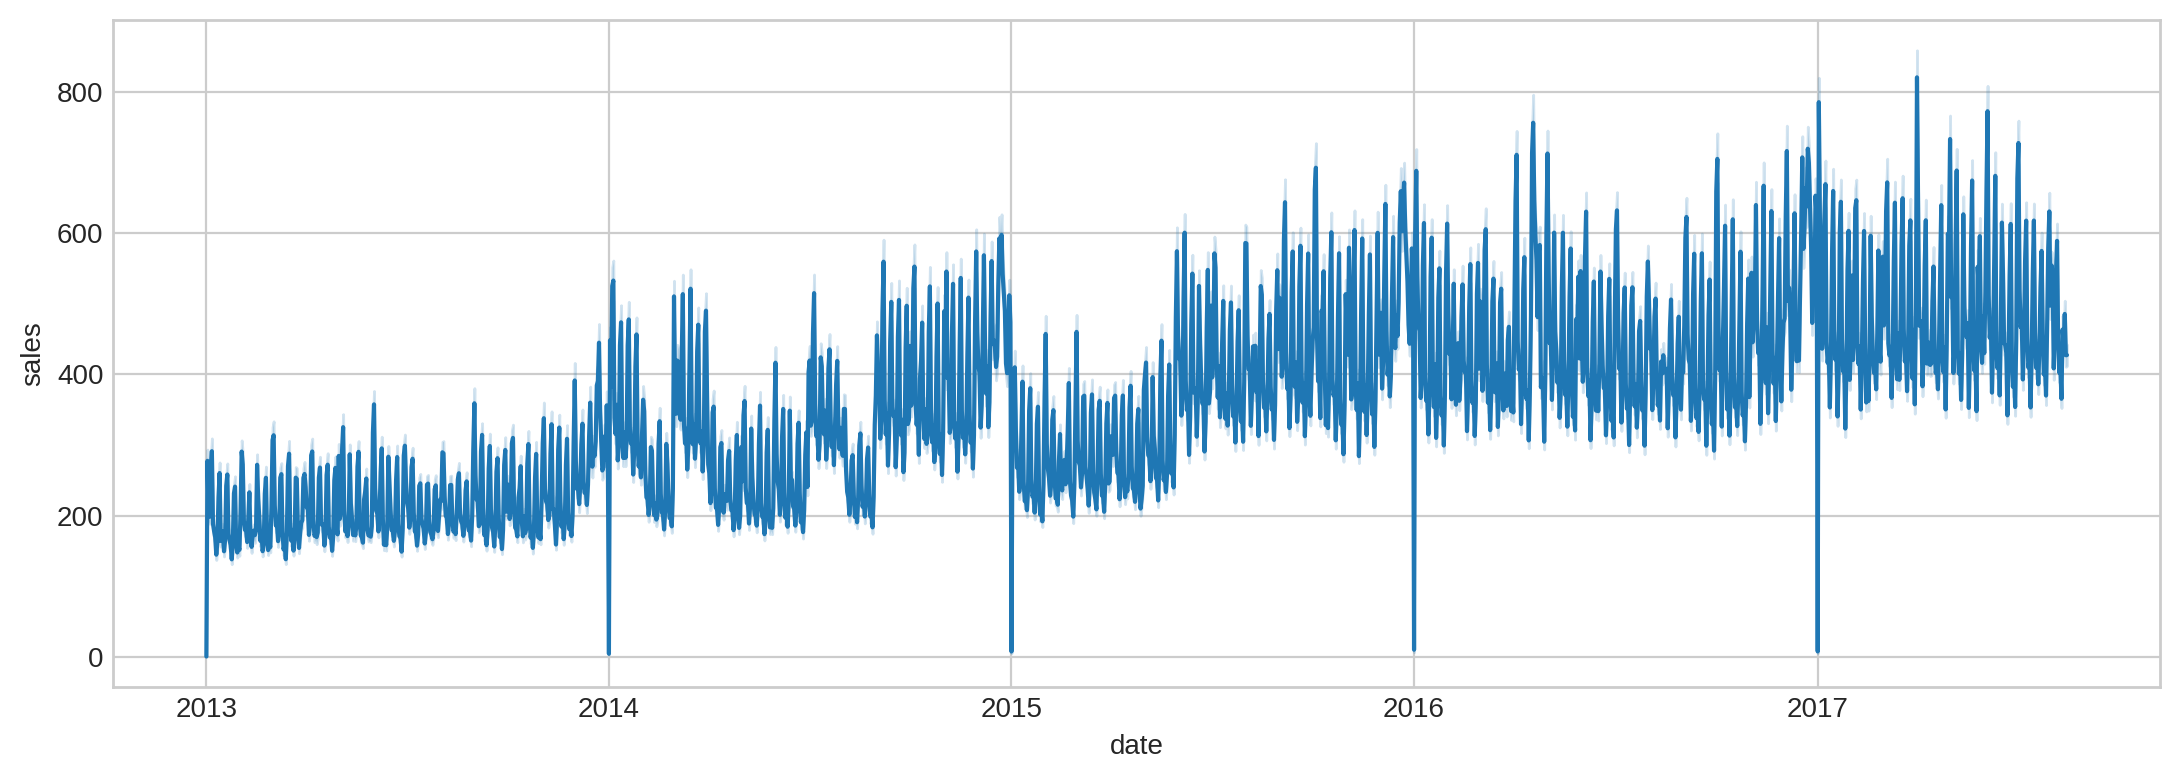

In [34]:
ma = train_df.sales.rolling(window=12).mean()
sns.lineplot(data=ma)

In [ ]:
sns.regplot(x='year', y='sales', data=train_df)

In [7]:
store_sales = train.copy()
store_sales = store_sales.set_index('date')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)

store_sales

id     sales  \
date       store_nbr family                                          
2013-01-01 1         AUTOMOTIVE                        0     0.000   
                     BABY CARE                         1     0.000   
                     BEAUTY                            2     0.000   
                     BEVERAGES                         3     0.000   
                     BOOKS                             4     0.000   
...                                                  ...       ...   
2017-08-15 9         POULTRY                     3000883   438.133   
                     PREPARED FOODS              3000884   154.553   
                     PRODUCE                     3000885  2419.729   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000   
                     SEAFOOD                     3000887    16.000   

                                                 onpromotion  
date       store_nbr family                                   
2013-01-01 1         AUTOMOTIVE                            0  
                     BABY CARE                             0  
                     BEAUTY                                0  
                     BEVERAGES                             0  
                     BOOKS                                 0  
...                                                      ...  
2017-08-15 9         POULTRY                               0  
                     PREPARED FOODS                        1  
                     PRODUCE                             148  
                     SCHOOL AND OFFICE SUPPLIES            8  
                     SEAFOOD                               0  

[3000888 rows x 3 columns]

In [8]:
average_sales = store_sales.groupby('date').mean()['sales']
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 1684, dtype: float64

In [9]:
store_sales['Time'] = np.arange(len(store_sales.index))
store_sales

id     sales  \
date       store_nbr family                                          
2013-01-01 1         AUTOMOTIVE                        0     0.000   
                     BABY CARE                         1     0.000   
                     BEAUTY                            2     0.000   
                     BEVERAGES                         3     0.000   
                     BOOKS                             4     0.000   
...                                                  ...       ...   
2017-08-15 9         POULTRY                     3000883   438.133   
                     PREPARED FOODS              3000884   154.553   
                     PRODUCE                     3000885  2419.729   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000   
                     SEAFOOD                     3000887    16.000   

                                                 onpromotion     Time  
date       store_nbr family                                            
2013-01-01 1         AUTOMOTIVE                            0        0  
                     BABY CARE                             0        1  
                     BEAUTY                                0        2  
                     BEVERAGES                             0        3  
                     BOOKS                                 0        4  
...                                                      ...      ...  
2017-08-15 9         POULTRY                               0  3000883  
                     PREPARED FOODS                        1  3000884  
                     PRODUCE                             148  3000885  
                     SCHOOL AND OFFICE SUPPLIES            8  3000886  
                     SEAFOOD                               0  3000887  

[3000888 rows x 4 columns]

In [10]:
train_df['Time'] = np.arange(len(train_df.date))
train_df

,date,store_nbr,family,sales,onpromotion,Time
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0,0
1,2013-01-01,1,BABY CARE,0.000,0,1
2,2013-01-01,1,BEAUTY,0.000,0,2
3,2013-01-01,1,BEVERAGES,0.000,0,3
4,2013-01-01,1,BOOKS,0.000,0,4
...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,3000883
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,3000884
3000885,2017-08-15,9,PRODUCE,2419.729,148,3000885


Error in callback <function _draw_all_if_interactive at 0x7f3159c93880> (for post_execute):


ValueError: Date ordinal 3150931.35 converts to 10596-12-15T08:24:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

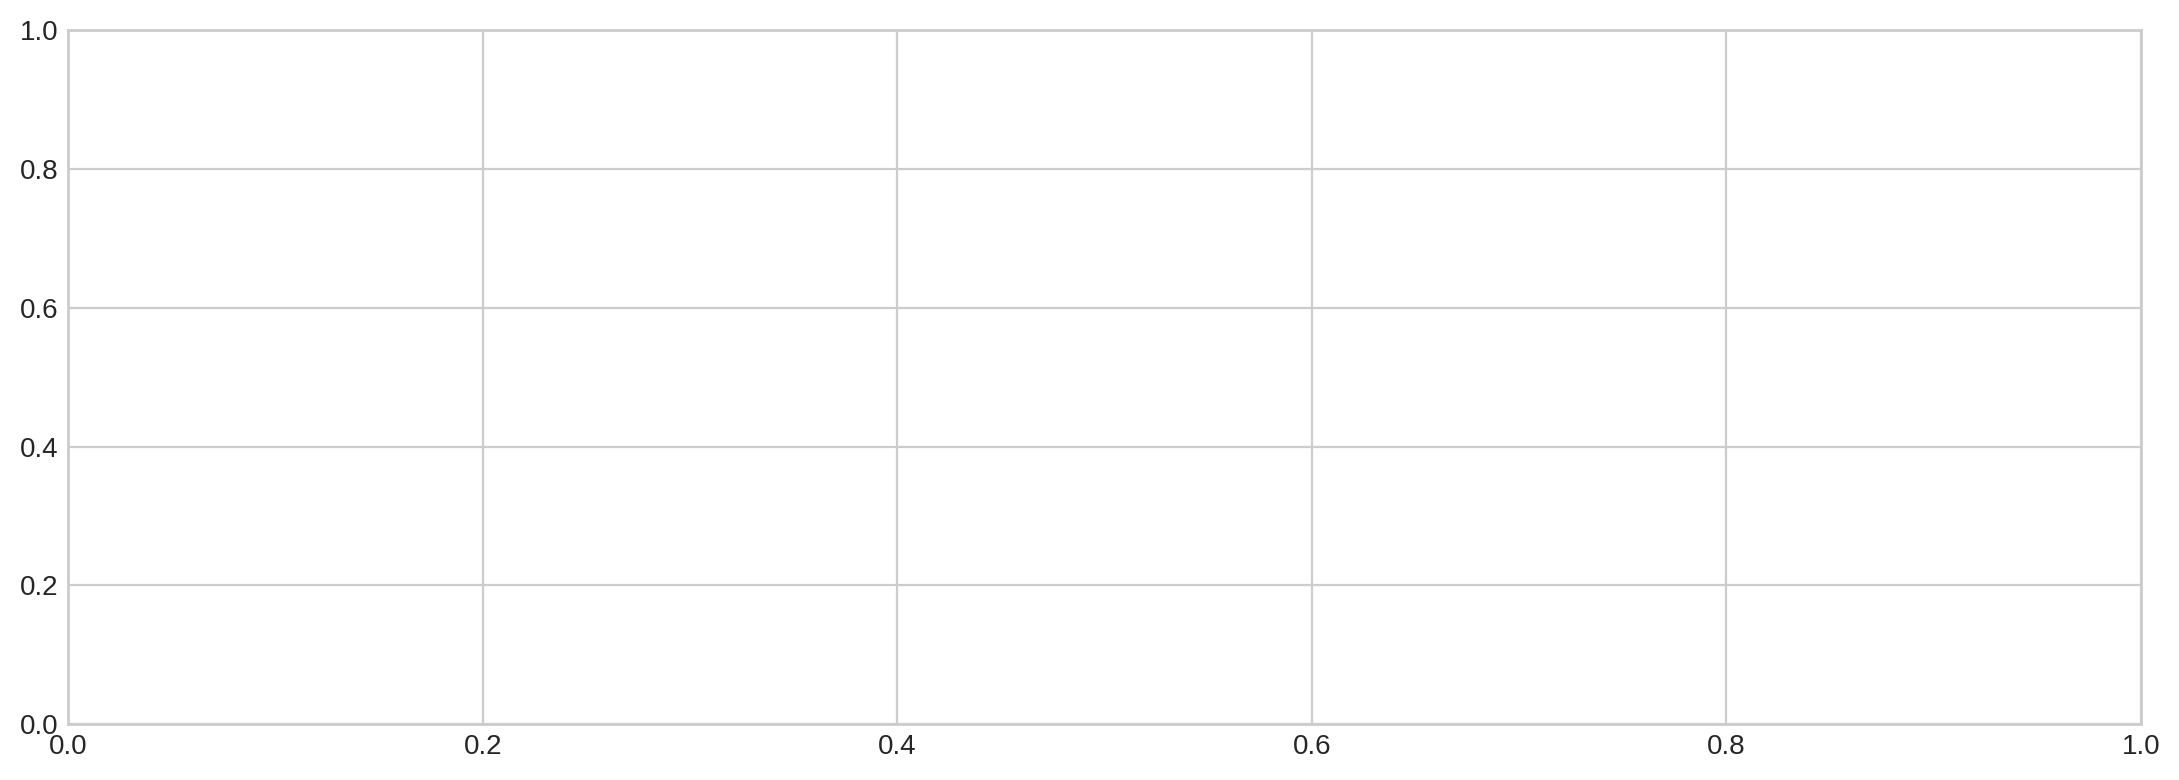

ValueError: Date ordinal 3150931.35 converts to 10596-12-15T08:24:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1100x400 with 1 Axes>

In [13]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()

ax = train_df.plot(x_compat=True)
ax.plot('Time', 'sales', data=train_df, color='0.75')
ax = sns.regplot(x='Time', y='sales', data=train_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Store Sales');
ax.xaxis_date()
